In [1]:
from data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Strong scaling - MPI

In [2]:
base_path = 'data/THIN/Weak Scaling/OMP'
path_512 = f'{base_path}/512x512'
path_4096 = f'{base_path}/4096x4096'

dhs_512 = []
dhs_4096 = []

In [3]:
filecodes = list(range(1,25))

for filecode in filecodes:
    filename_512 = f'mandelbrot_weak_omp_512_{filecode}.log'
    filename_4096 = f'mandelbrot_weak_omp_4096_{filecode}.log'
    dh_512 = DataHandler(f'{path_512}/{filename_512}')
    # dh_4096 = DataHandler(f'{path_4096}/{filename_4096}')
    dhs_512.append(dh_512)
    # dhs_4096.append(dh_4096)
    


In [4]:
durations_512 = [dh.duration() for dh in dhs_512]
durations_4096 = [dh.duration() for dh in dhs_4096]
speedups_512 = [durations_512[i]/durations_512[i-1] for i in range(1, len(durations_512))]
speedups_4096 = [durations_4096[i]/durations_4096[i-1] for i in range(1, len(durations_4096))]

In [5]:
from sklearn.linear_model import LinearRegression

x = np.arange(1, len(durations_512)+1).reshape(-1,1)
y = durations_512


In [6]:
model = LogisticRegression()
model.fit(x, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

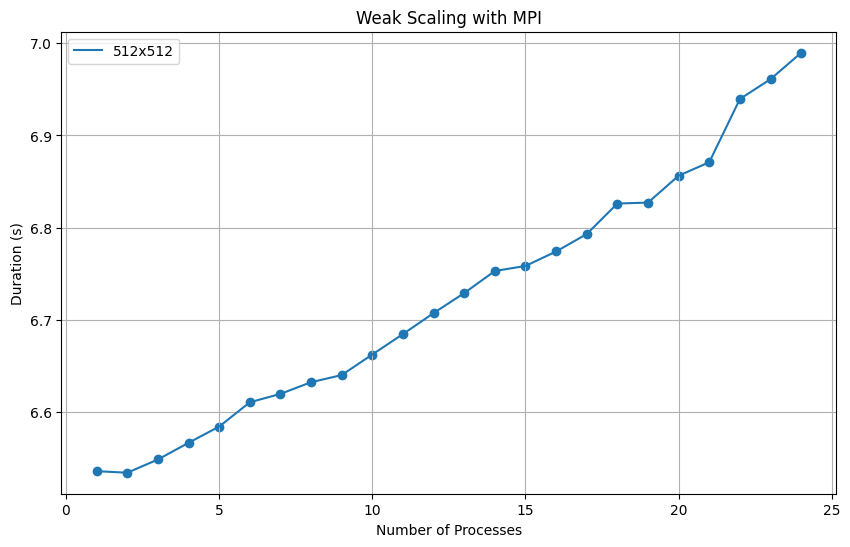

In [7]:
# add dots for the actual data points
plt.figure(figsize=(10, 6))
plt.plot(filecodes, durations_512, label='512x512')
plt.scatter(filecodes, durations_512)
# plt.plot(filecodes, durations_4096, label='4096x4096')
# plt.scatter(filecodes, durations_4096)
plt.xlabel('Number of Processes')
plt.ylabel('Duration (s)')
plt.title('Weak Scaling with MPI')
plt.legend()
plt.grid()
plt.show()

Amdahl's law parameter estimation

In [33]:
p_512 = 2 * (1 - durations_512[1]/durations_512[0]) 
p_4096 = 2 * (1 - durations_4096[1]/durations_4096[0])
# p_512 = (1 - durations_512[1]/durations_512[0]) + (1 - durations_512[2]/durations_512[1])
# p_4096 = (1 - durations_4096[1]/durations_4096[0]) + (1 - durations_4096[2]/durations_4096[1])
print(f'p_512 = {p_512:.2f}')
print(f'p_4096 = {p_4096:.2f}')

p_512 = 1.00
p_4096 = 1.00


In [34]:
# p_4096=1
# p_512=1

In [35]:
# line with slope p
amdal_speedup = lambda p, n: 1/( (1-p) + p/n)
amdal_time = lambda p, n, t_prev: t_prev * ( (1-p) + p/n)

## Amdal time vs Actual time

In [36]:
amdal_time_512 = [amdal_time(p_512, n, durations_512[0]) for n in filecodes]
amdal_time_4096 = [amdal_time(p_4096, n, durations_4096[0]) for n in filecodes]

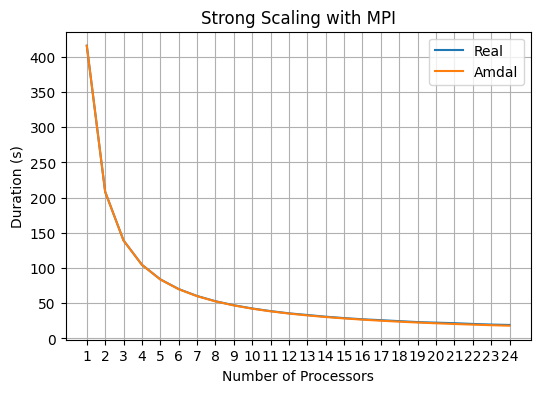

In [141]:
plt.figure(figsize=(6, 4))
plt.plot(filecodes, durations_4096, label='Real')
# plt.scatter(filecodes, durations_4096_new)
plt.plot(filecodes, amdal_time_4096, label='Amdal')
plt.xticks(filecodes)
plt.xlabel('Number of Processors')
plt.ylabel('Duration (s)')
plt.title('Strong Scaling with MPI')
plt.legend()
plt.grid()
plt.show()

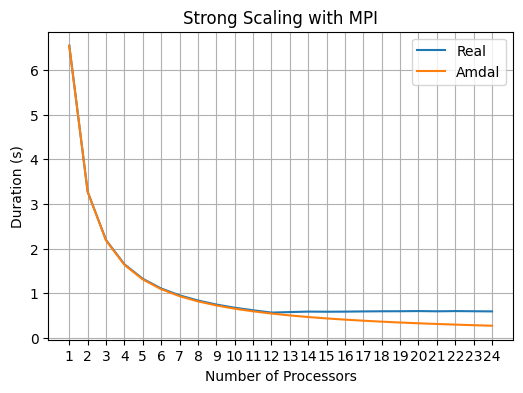

In [166]:
plt.figure(figsize=(6, 4))
plt.plot(filecodes, durations_512, label='Real')
# plt.scatter(filecodes, durations_512)
plt.xticks(filecodes)
plt.plot(filecodes, amdal_time_512, label='Amdal')
plt.xlabel('Number of Processors')
plt.ylabel('Duration (s)')
plt.title('Strong Scaling with MPI')
plt.legend()
plt.grid()
plt.show()

In [40]:
print('real ',durations_4096)
print('amdal ',amdal_time_4096)

real  [415.661696, 208.247553, 139.165655, 104.656798, 83.975518, 70.16855, 60.33325, 52.92974, 47.198111, 42.618235, 38.863273, 35.710124, 36.207067, 36.441758, 36.608824, 36.911322, 37.130758, 37.279484, 37.460135, 37.558358, 37.679134, 37.679653, 37.686583, 37.721004]
amdal  [415.661696, 208.24755299999998, 139.10950533333332, 104.54048149999998, 83.79906719999998, 69.97145766666665, 60.09459371428571, 52.686945749999985, 46.92544177777776, 42.316238599999984, 38.54507236363634, 35.40243383333332, 32.743278153846134, 30.464001857142843, 28.488629066666654, 26.760177874999982, 25.235073882352925, 23.87942588888887, 22.66647768421051, 21.574824299999985, 20.58713790476189, 19.689241181818165, 18.86942243478259, 18.11792191666665]


## Load imbalance